load the dataset in a notebook and preprocess it.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [12]:
!pip install xlrd


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. fichier excel

In [13]:
data_superstore = pd.read_excel('US Superstore data.xls', index_col = 0)

2. convertir en csv

In [14]:
data_superstore.to_csv('data_superstore.csv', index=False)


3. dataframe

In [16]:
df_stores = pd.DataFrame(data_superstore)

4. exploration ( head, info, describe, missing values, )

In [17]:
df_stores.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

In [19]:
df_stores.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


missing values

In [ ]:
missing_data = df_stores.isnull()
print(missing_data)

In [22]:
missing_counts = df_stores.isnull().sum()
print(missing_counts)

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Which states have the most sales? --> creating vertical bar chart : compare sales per states

regrouper sales (.groupby)- additionner (.sum)- trier(.sorted_values)
groupby()
👉 On peut écrire : df.groupby("State")["Sales"].sum().sort_values(ascending=False)

In [23]:
sales_by_state = df_stores.groupby("State")["Sales"].sum().sort_values(ascending=False)

In [24]:
sales_by_state.head()

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

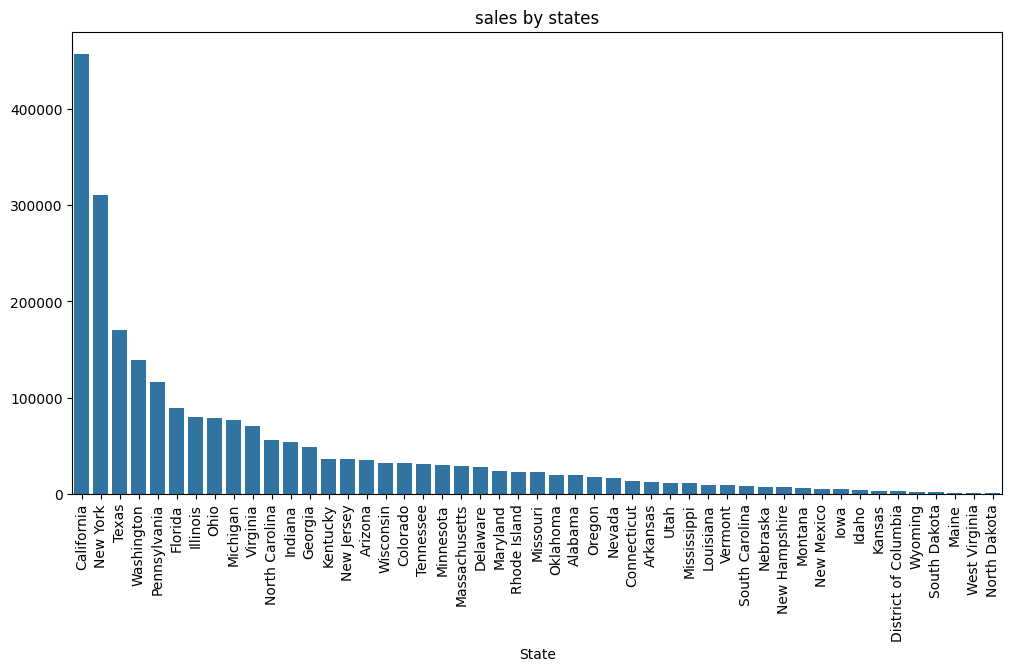

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values)
plt.xticks(rotation=90)
plt.title("sales by states")
plt.show()

What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

selection New York dans df_stores avec la condition (==)

In [26]:
df_ny = df_stores[df_stores['State'] == 'New York']

In [27]:
df_ca = df_stores[df_stores['State'] == 'California']

# Filter data for New York and California
2ny_ca_data = df[df['State'].isin(['New York', 'California'])]
3
4# Group by state and sum sales and profit
5ny_ca_summary = ny_ca_data.groupby('State')[['Sales', 'Profit']].sum().reset_index()

In [28]:
ny_ca_data = df_stores[df_stores['State'].isin(['New York', 'California'])]

In [29]:
ny_ca_sum = ny_ca_data.groupby('State')[['Sales', 'Profit']]

In [30]:
ny_ca_sum.head()

,Sales,Profit
Row ID,,
3,14.620,6.8714
6,48.860,14.1694
7,7.280,1.9656
8,907.152,90.7152
9,18.504,5.7825
54,15.260,6.2566
55,1029.950,298.6855
56,208.560,52.1400
57,32.400,15.5520


In [31]:
ny_ca_summary = ny_ca_data.groupby('State')[['Sales', 'Profit']].sum().reset_index()

In [32]:
ny_ca_summary.head()

,State,Sales,Profit
0,California,457687.6315,76381.3871
1,New York,310876.2710,74038.5486


visualisation

C:\Users\rickia\AppData\Local\Temp\ipykernel_17820\2516449702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State", y="Sales", data=ny_ca_summary, palette="coolwarm")


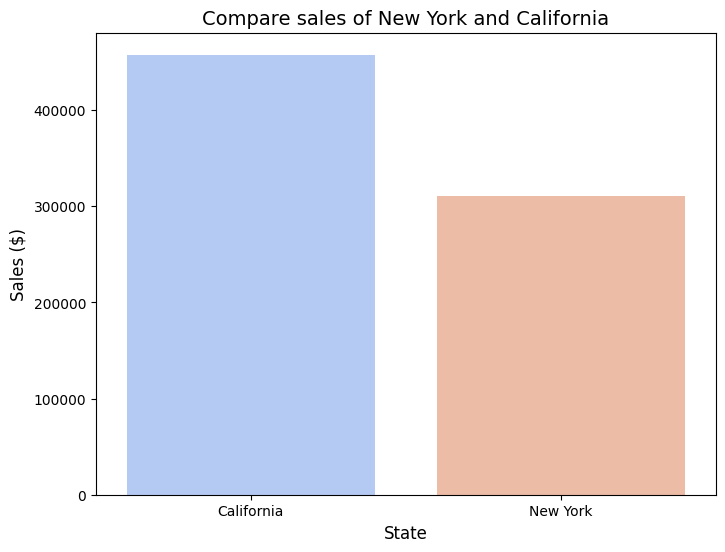

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x="State", y="Sales", data=ny_ca_summary, palette="coolwarm")
plt.title("Compare sales of New York and California", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Sales ($)", fontsize=12)
plt.show()

C:\Users\rickia\AppData\Local\Temp\ipykernel_17820\4004357812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State", y="Profit", data=ny_ca_summary, palette="coolwarm")


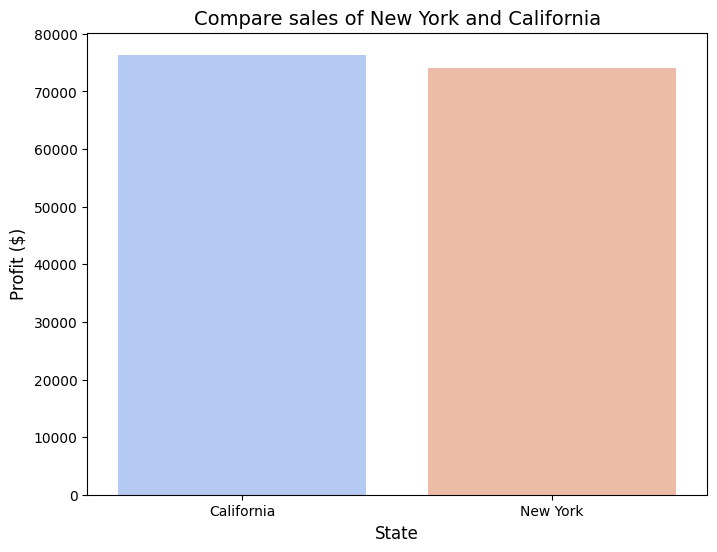

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x="State", y="Profit", data=ny_ca_summary, palette="coolwarm")
plt.title("Compare sales of New York and California", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.show()

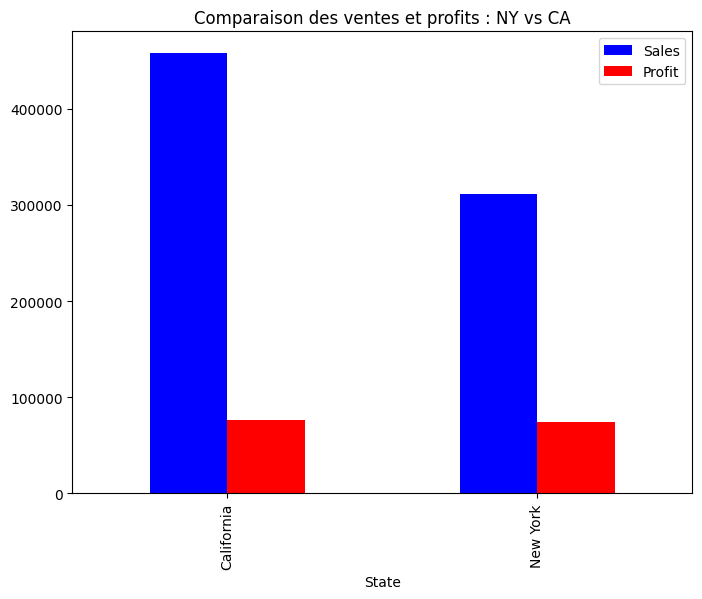

In [70]:
ny_ca = df_stores[df_stores["State"].isin(["New York", "California"])].groupby("State")[["Sales", "Profit"]].sum()
ny_ca.plot(kind="bar", figsize=(8,6), color=["blue", "red"])
plt.title("Comparaison des ventes et profits : NY vs CA")
plt.show()

Who is an outstanding customer in New York?

In [60]:
ny_customers = df_stores[df_stores["State"] == "New York"].groupby("Customer Name")["Sales"].sum().idxmax()

In [66]:
print(f" the outstanding customer is : {ny_customers}")

 the outstanding customer is : Tom Ashbrook


Are there any differences among states in profitability?

In [ ]:
state_profit = df_stores.groupby("State")["Profit"].sum().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_profit.index, y=state_profit.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Total Profit by State")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

In [74]:
print(state_profit)

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

C:\Users\rickia\AppData\Local\Temp\ipykernel_17820\2423832181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_profit.index, y=state_profit.values, palette="coolwarm")


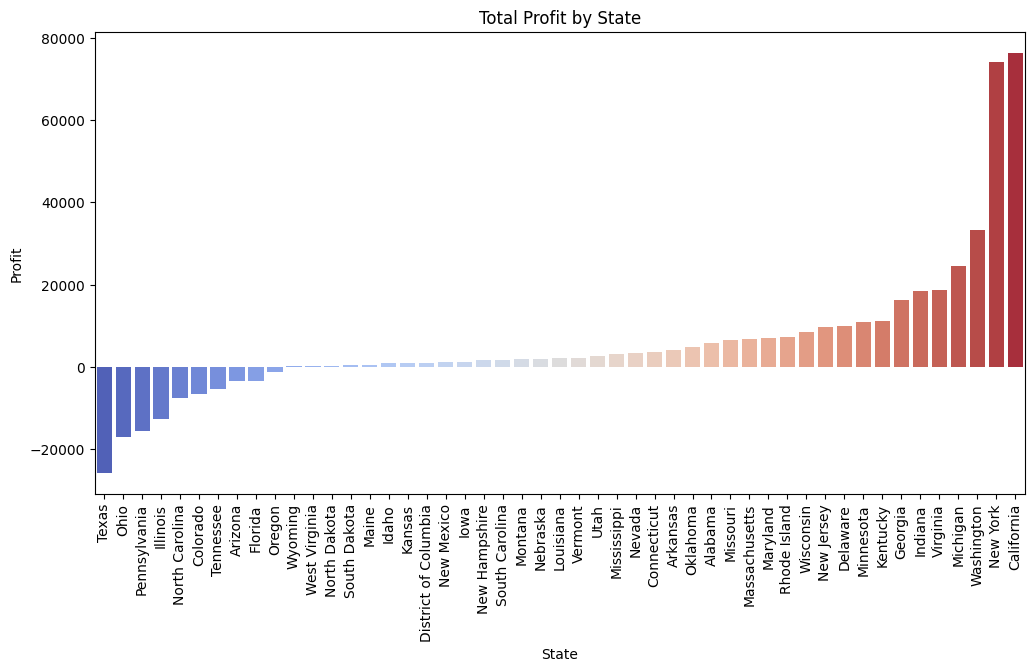

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_profit.index, y=state_profit.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Total Profit by State")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

Appliquer le principe de Pareto (80% du profit vient-il de 20% des clients ?).

1.calculer le profit total par client--> customers_profit
2.calculer le profit cumulé par client et exprimer en pourcentage (divise par le profit total)---> .cumsum() / customers_profit--> cumsum_profit
3. afficher avec un lineplot les pourcentage du profit cumulé en fonction des clients exprimé en pourcentage --> axe x =  %client, axe y = %profit cumulé.

In [78]:
customers_profit = df_stores.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)
print(customers_profit)

Customer Name
Tamara Chand      8981.3239
Raymond Buch      6976.0959
Sanjit Chand      5757.4119
Hunter Lopez      5622.4292
Adrian Barton     5444.8055
                    ...    
Henry Goldwyn    -2797.9635
Sharelle Roach   -3333.9144
Luke Foster      -3583.9770
Grant Thornton   -4108.6589
Cindy Stewart    -6626.3895
Name: Profit, Length: 793, dtype: float64


In [80]:
x = customers_profit.cumsum()
print(x)

Customer Name
Tamara Chand        8981.3239
Raymond Buch       15957.4198
Sanjit Chand       21714.8317
Hunter Lopez       27337.2609
Adrian Barton      32782.0664
                     ...     
Henry Goldwyn     304049.9615
Sharelle Roach    300716.0471
Luke Foster       297132.0701
Grant Thornton    293023.4112
Cindy Stewart     286397.0217
Name: Profit, Length: 793, dtype: float64


In [81]:
cumsum_profit = customers_profit.cumsum() / customers_profit.sum()
print(cumsum_profit)

Customer Name
Tamara Chand      0.031360
Raymond Buch      0.055718
Sanjit Chand      0.075821
Hunter Lopez      0.095452
Adrian Barton     0.114464
                    ...   
Henry Goldwyn     1.061638
Sharelle Roach    1.049997
Luke Foster       1.037483
Grant Thornton    1.023137
Cindy Stewart     1.000000
Name: Profit, Length: 793, dtype: float64


In [ ]:
customers_tt = len(customers_profit) 
print(customers_tt)

793


In [102]:
customers_percentage = (customers_profit.rank(method="first", ascending=False) / customers_tt) * 100
print(customers_percentage)

Customer Name
Tamara Chand        0.126103
Raymond Buch        0.252207
Sanjit Chand        0.378310
Hunter Lopez        0.504414
Adrian Barton       0.630517
                     ...    
Henry Goldwyn      99.495586
Sharelle Roach     99.621690
Luke Foster        99.747793
Grant Thornton     99.873897
Cindy Stewart     100.000000
Name: Profit, Length: 793, dtype: float64


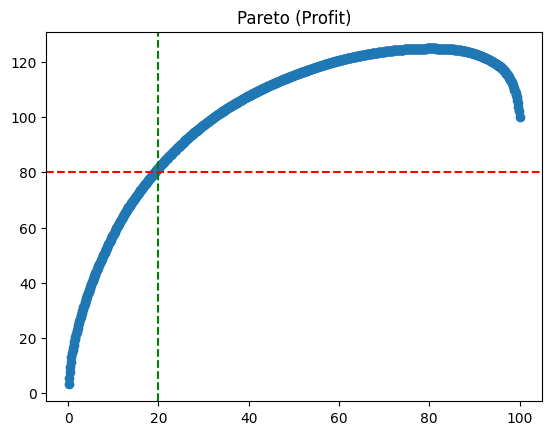

In [103]:
customers_profit = df_stores.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)
cumsum_profit = customers_profit.cumsum() / customers_profit.sum()*100
plt.plot(customers_percentage.values, cumsum_profit.values, marker="o")
# plt.plot(percentage_clients, cumsum_profit.values, marker="o")
plt.axhline(y=80, color="r", linestyle="--", label="80% du Profit")
plt.axvline(x=20, color="g", linestyle="--", label="20% des Clients")
plt.title("Pareto (Profit)")
plt.show()

oui, il est possible d'appliquer la loi pareto aux clients et au profit. 

Quelles sont les 20 premières villes en termes de ventes ? Qu'en est-il des 20 premières villes en termes de bénéfices ? Existe-t-il des différences de rentabilité entre les villes ? (Identifiez les 20 premières villes en fonction du total des ventes et du total des bénéfices et analysez les différences de rentabilité entre ces villes.)

Quelles sont les 20 premières villes en termes de ventes?

In [112]:
sales_by_city = df_stores.groupby ('City')['Sales'].sum().sort_values(ascending=False)
print(sales_by_city.head(20))

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64


In [110]:
profit_by_city = df_stores.groupby ('City')['Profit'].sum().sort_values(ascending=False)
print(profit_by_city.head(20))

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Springfield       6200.6974
Columbus          5897.1013
Newark            5793.7588
Columbia          5606.1167
Richmond          5567.2486
Providence        5505.6569
Henderson         4911.8609
Arlington         4169.6969
Lakewood          3234.0278
Milwaukee         2793.0851
Name: Profit, dtype: float64


Quels sont les 20 meilleurs clients en termes de ventes ?

In [118]:
sales_by_customers = df_stores.groupby ('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20)
print(sales_by_customers)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


Tracer la courbe cumulative des ventes par clients. Peut-on appliquer le principe de Pareto aux clients et aux ventes ?

calculer les ventes cumulées. nombre total de vente. 

In [121]:
cumsum_sales = sales_by_customers.cumsum()
print(cumsum_sales)

Customer Name
Sean Miller            25043.050
Tamara Chand           44095.268
Raymond Buch           59212.607
Tom Ashbrook           73808.227
Adrian Barton          88281.798
Ken Lonsdale          102457.027
Sanjit Chand          116599.361
Hunter Lopez          129472.659
Sanjit Engle          141682.097
Christopher Conant    153811.169
Todd Sumrall          165702.920
Greg Tran             177523.040
Becky Martin          189312.670
Seth Vernon           200783.620
Caroline Jumper       211948.594
Clay Ludtke           222829.140
Maria Etezadi         233492.868
Karen Ferguson        244097.134
Bill Shonely          254598.787
Edward Hooks          264909.667
Name: Sales, dtype: float64


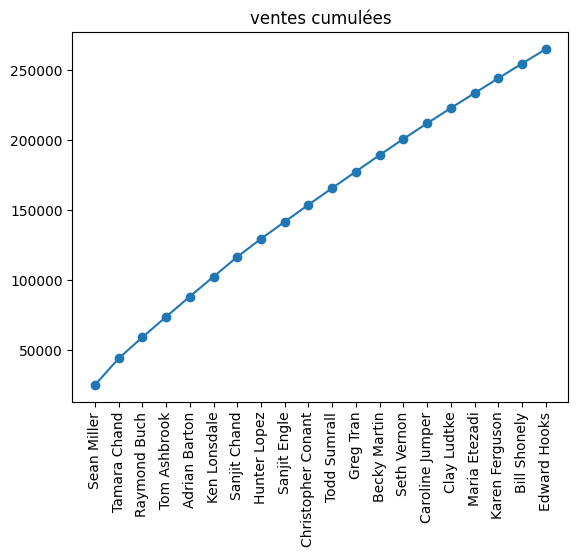

In [123]:
plt.plot(cumsum_sales.index, cumsum_sales.values,marker="o")
plt.xticks(rotation=90)
plt.title("ventes cumulées")
plt.show()

Sur la base de l’analyse, prenez des décisions sur les États et les villes à privilégier pour les stratégies de marketing.